In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train:", x_train.shape)


K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#Get the y value
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Transform images from (width, width, 3) to 3072-dimensional vectors (width*width*3)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H = 200
std=1e-5
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)


x_train: (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [3]:
epochs= 300
lr = 0.014
lr_decay=0.999
reg = 5e-5
batch_size = Ntr
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0

for t in range(epochs):
    indices = np.random.choice(Ntr, batch_size)
    x = x_train[indices]
    y = y_train[indices]
    h = 1.0/(1.0 + np.exp(-(x.dot(w1) + b1)))
    y_pred = h.dot(w2) +b2
    loss = 1./(batch_size*2)*np.square(y_pred - y).sum() + reg * (np.sum(w2 * w2) + np.sum(w1 * w1))
    loss_history.append(loss)
    
    print('epochs %d / %d: loss %f' %(t, epochs, loss))
    dy_pred = 1./batch_size*2.0*(y_pred -y) 
    dw2 = h.T.dot(dy_pred) + reg*w2
    db2 = dy_pred.sum(axis=0)
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay

epochs 0 / 300: loss 0.499979
epochs 1 / 300: loss 0.459172
epochs 2 / 300: loss 0.451685
epochs 3 / 300: loss 0.450302
epochs 4 / 300: loss 0.452414
epochs 5 / 300: loss 0.464301
epochs 6 / 300: loss 0.453349
epochs 7 / 300: loss 0.442191
epochs 8 / 300: loss 0.438254
epochs 9 / 300: loss 0.435303
epochs 10 / 300: loss 0.432606
epochs 11 / 300: loss 0.430073
epochs 12 / 300: loss 0.428495
epochs 13 / 300: loss 0.427690
epochs 14 / 300: loss 0.427974
epochs 15 / 300: loss 0.425817
epochs 16 / 300: loss 0.422525
epochs 17 / 300: loss 0.422579
epochs 18 / 300: loss 0.422236
epochs 19 / 300: loss 0.422427
epochs 20 / 300: loss 0.422685
epochs 21 / 300: loss 0.420288
epochs 22 / 300: loss 0.420089
epochs 23 / 300: loss 0.421715
epochs 24 / 300: loss 0.417512
epochs 25 / 300: loss 0.416394
epochs 26 / 300: loss 0.415752
epochs 27 / 300: loss 0.417003
epochs 28 / 300: loss 0.416461
epochs 29 / 300: loss 0.416158
epochs 30 / 300: loss 0.414287
epochs 31 / 300: loss 0.414140
epochs 32 / 300: l

epochs 260 / 300: loss 0.370312
epochs 261 / 300: loss 0.371487
epochs 262 / 300: loss 0.371754
epochs 263 / 300: loss 0.372362
epochs 264 / 300: loss 0.370842
epochs 265 / 300: loss 0.369330
epochs 266 / 300: loss 0.369827
epochs 267 / 300: loss 0.369849
epochs 268 / 300: loss 0.367455
epochs 269 / 300: loss 0.368528
epochs 270 / 300: loss 0.368546
epochs 271 / 300: loss 0.368138
epochs 272 / 300: loss 0.370748
epochs 273 / 300: loss 0.370971
epochs 274 / 300: loss 0.371816
epochs 275 / 300: loss 0.367447
epochs 276 / 300: loss 0.366206
epochs 277 / 300: loss 0.366165
epochs 278 / 300: loss 0.368409
epochs 279 / 300: loss 0.371851
epochs 280 / 300: loss 0.372017
epochs 281 / 300: loss 0.369771
epochs 282 / 300: loss 0.367781
epochs 283 / 300: loss 0.368389
epochs 284 / 300: loss 0.366718
epochs 285 / 300: loss 0.367963
epochs 286 / 300: loss 0.368485
epochs 287 / 300: loss 0.367812
epochs 288 / 300: loss 0.365716
epochs 289 / 300: loss 0.366708
epochs 290 / 300: loss 0.368380
epochs 2

In [7]:
x_t = x_train
h = 1.0/(1.0 + np.exp(-(x_t.dot(w1) + b1))) #sigmoid
y_pred = h.dot(w2) + b2
tr_ac = 1.0 -1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1) - np.argmax(y_pred, axis=1))).sum()
train_loss = 1.0 -1/(81*Ntr)*np.square(np.argmax(y_train,axis=1) - np.argmax(y_pred, axis=1)).sum()
+ reg*(np.sum(w2*w2)+np.sum(w1*w1))
print("train_accuracy = ", tr_ac)
print("train_loss = ", train_loss)

x_t = x_test
h = 1.0/(1.0 + np.exp(-(x_t.dot(w1) + b1))) #sigmoid
y_pred= h.dot(w2) + b2
ts_ac = 1.0 - 1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred, axis=1))).sum()
test_loss = 1.0 -1/(81*Nte)*np.square(np.argmax(y_test,axis=1) - np.argmax(y_pred, axis=1)).sum() 
+ reg*(np.sum(w2*w2)+np.sum(w1*w1))
print("test_accuracy = ", ts_ac)
print("test_loss = ", test_loss)

train_accuracy =  0.7846244444444445
train_loss =  0.8757014814814814
test_accuracy =  0.7652111111111111
test_loss =  0.8625123456790124


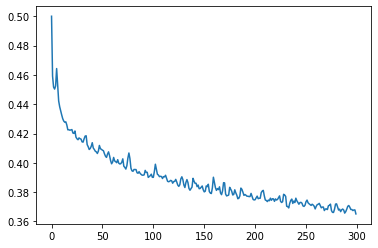

In [8]:
plt.plot(loss_history)